# Importando as bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extraindo a composição do Ibovespa

In [2]:
Carteira_ibov = pd.read_excel("IBOVDia_04-11-24.xlsx")
Carteira_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ALOS3,ALLOS,ON NM,502481592,0.513
1,ALPA4,ALPARGATAS,PN N1,166460180,0.057
2,ABEV3,AMBEV S/A,ON,4394835131,2.611
3,ASAI3,ASSAI,ON NM,1349687675,0.469
4,AURE3,AUREN,ON NM,291727616,0.141
...,...,...,...,...,...
81,VAMO3,VAMOS,ON NM,485166826,0.133
82,VBBR3,VIBRA,ON NM,1023392529,1.073
83,VIVA3,VIVARA S.A.,ON NM,125823025,0.148
84,WEGE3,WEG,ON NM,1269032828,3.289


In [3]:
# Ordenando o DataFrame pela coluna "Part. (%)" em ordem decrescente
Carteira_ibov = Carteira_ibov.sort_values(by="Part. (%)", ascending=False)
Carteira_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
80,VALE3,VALE,ON NM,4270903023,12.553
58,PETR4,PETROBRAS,PN N2,4431132660,7.437
45,ITUB4,ITAUUNIBANCO,PN EJ N1,4455161368,7.349
57,PETR3,PETROBRAS,ON N2,2448348744,4.443
12,BBAS3,BRASIL,ON NM,2842613858,3.514
...,...,...,...,...,...
53,BEEF3,MINERVA,ON ATZ NM,261359935,0.071
35,EZTC3,EZTEC,ON NM,97334950,0.069
1,ALPA4,ALPARGATAS,PN N1,166460180,0.057
56,PCAR3,P.ACUCAR-CBD,ON NM,379327171,0.053


# Extraindo as 5 ações mais representativas

In [4]:
# Selecionando as 5 primeiras linhas
Carteira_ibov = Carteira_ibov.head(5)
Carteira_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
80,VALE3,VALE,ON NM,4270903023,12.553
58,PETR4,PETROBRAS,PN N2,4431132660,7.437
45,ITUB4,ITAUUNIBANCO,PN EJ N1,4455161368,7.349
57,PETR3,PETROBRAS,ON N2,2448348744,4.443
12,BBAS3,BRASIL,ON NM,2842613858,3.514


In [5]:
# Calculando a soma da coluna "Part. (%)"
soma_participacao = Carteira_ibov['Part. (%)'].sum()
soma_participacao

35.29600000000001

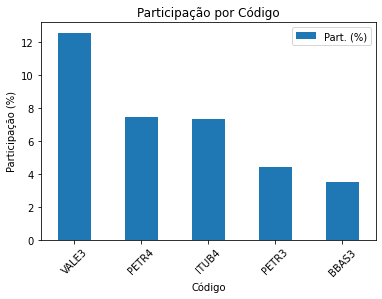

In [6]:
# Criando o gráfico de barras
Carteira_ibov.plot(kind='bar', x='Código', y='Part. (%)')

# Personalizando o gráfico
plt.title('Participação por Código')
plt.xlabel('Código')
plt.ylabel('Participação (%)')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor visualização

# Exibindo o gráfico
plt.show()

# Coletando as cotações das 5 principais ações do IBOV

In [7]:
Ticker = ["VALE3.SA","PETR4.SA","ITUB4.SA","PETR3.SA","BBAS3.SA"]
Ações = pd.DataFrame()

In [8]:
# Concatenar todos os dados primeiro
for ticker in Ticker:
    # Obtém dados de preços
    dados_precos = yf.Ticker(ticker)
    dados_precos = dados_precos.history(period="10y")
    dados_precos['Ticker'] = ticker
    Ações = pd.concat([Ações, dados_precos], axis=0)

In [9]:
Ações

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2014-11-03 00:00:00-02:00,13.505617,13.614974,13.292370,13.614974,6606900,0.0,0.0,VALE3.SA
2014-11-04 00:00:00-02:00,13.549361,13.576700,13.002575,13.183014,4811500,0.0,0.0,VALE3.SA
2014-11-05 00:00:00-02:00,12.986172,13.265033,12.827603,13.122869,5420400,0.0,0.0,VALE3.SA
2014-11-06 00:00:00-02:00,12.871345,13.057251,12.745584,12.931491,5098800,0.0,0.0,VALE3.SA
2014-11-07 00:00:00-02:00,12.936959,13.314242,12.936959,13.133802,3637500,0.0,0.0,VALE3.SA
...,...,...,...,...,...,...,...,...
2024-10-28 00:00:00-03:00,26.500000,26.549999,26.190001,26.320000,18192100,0.0,0.0,BBAS3.SA
2024-10-29 00:00:00-03:00,26.370001,26.450001,26.150000,26.170000,13433400,0.0,0.0,BBAS3.SA
2024-10-30 00:00:00-03:00,26.180000,26.389999,26.090000,26.370001,14377600,0.0,0.0,BBAS3.SA


In [10]:
# Selecionando apenas a coluna 'close' e o ticker
Ações = Ações[['Close', 'Ticker']]

# Pivotando os dados
Ações = Ações.pivot_table(index='Date', columns='Ticker', values='Close')
Ações

Ticker,BBAS3.SA,ITUB4.SA,PETR3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2014-11-03 00:00:00-02:00,7.418743,13.567582,4.823609,4.766639,13.614974
2014-11-04 00:00:00-02:00,7.792797,13.827071,4.823609,4.757010,13.183014
2014-11-05 00:00:00-02:00,7.174792,13.675082,4.691594,4.622196,13.122869
2014-11-06 00:00:00-02:00,6.871214,13.178344,4.586660,4.513062,12.931491
2014-11-07 00:00:00-02:00,7.044685,13.400767,4.661129,4.580469,13.133802
...,...,...,...,...,...
2024-10-28 00:00:00-03:00,26.320000,35.711990,39.320000,36.090000,62.880001
2024-10-29 00:00:00-03:00,26.170000,35.332180,39.220001,36.009998,62.660000
2024-10-30 00:00:00-03:00,26.370001,35.232235,38.880001,35.849998,62.470001


# Plotando os gráficos das cotações

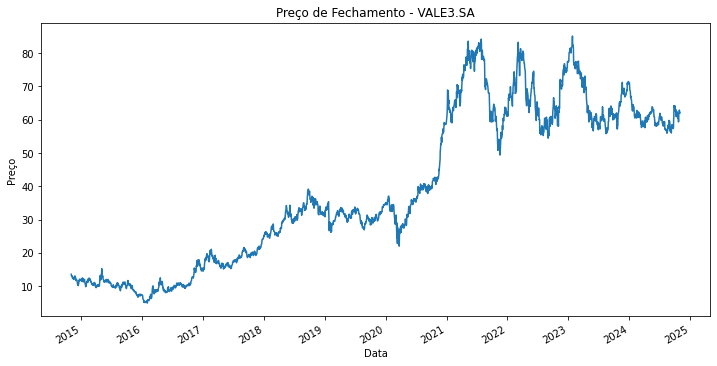

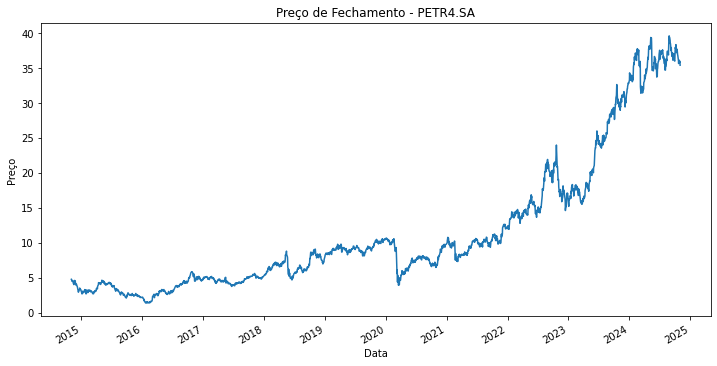

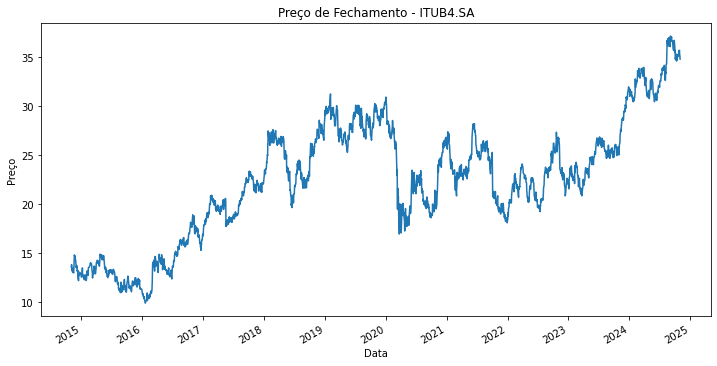

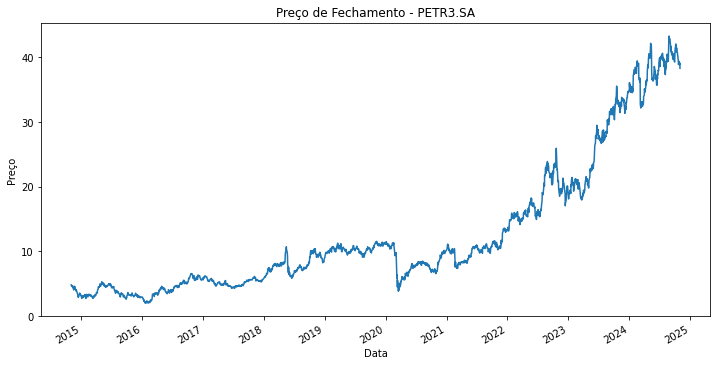

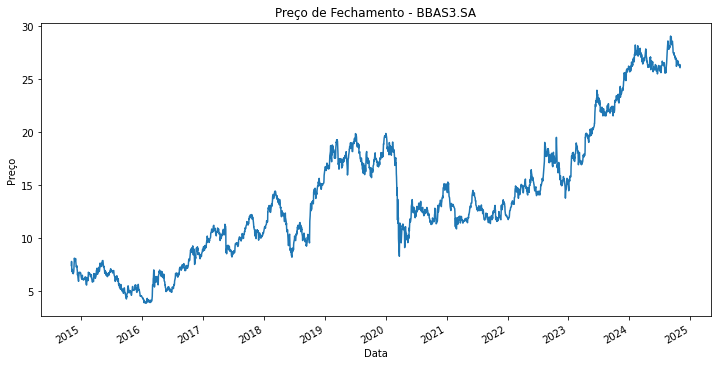

In [12]:
for ticker in Ticker:
    # Obtém dados de preços
    dados_precos = yf.Ticker(ticker).history(period="10y")

    # Plota o gráfico
    dados_precos['Close'].plot(figsize=(12, 6))
    plt.title(f'Preço de Fechamento - {ticker}')
    plt.ylabel('Preço')
    plt.xlabel('Data')
    plt.grid(False)
    plt.show()

# Calculando os retornos diários

In [13]:
Ações = Ações / Ações.shift(1) - 1
Ações.dropna().index[0]
Ações

Ticker,BBAS3.SA,ITUB4.SA,PETR3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2014-11-03 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN
2014-11-04 00:00:00-02:00,0.050420,0.019126,0.000000,-0.002020,-0.031727
2014-11-05 00:00:00-02:00,-0.079305,-0.010992,-0.027368,-0.028340,-0.004562
2014-11-06 00:00:00-02:00,-0.042312,-0.036324,-0.022366,-0.023611,-0.014584
2014-11-07 00:00:00-02:00,0.025246,0.016878,0.016236,0.014936,0.015645
...,...,...,...,...,...
2024-10-28 00:00:00-03:00,-0.001896,0.012181,-0.002031,-0.001660,0.018630
2024-10-29 00:00:00-03:00,-0.005699,-0.010635,-0.002543,-0.002217,-0.003499
2024-10-30 00:00:00-03:00,0.007642,-0.002829,-0.008669,-0.004443,-0.003032


# Plotando os gráficos das variações

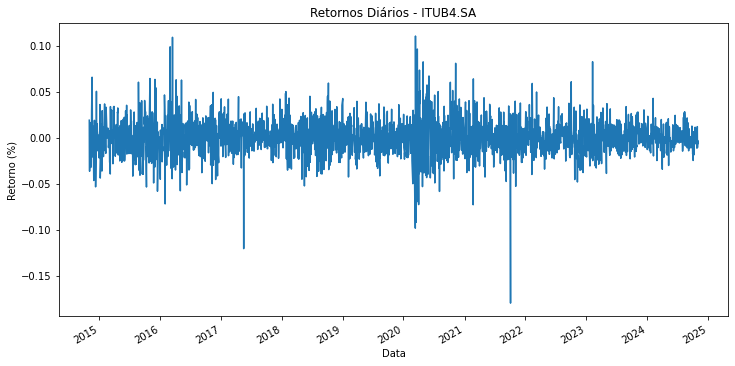

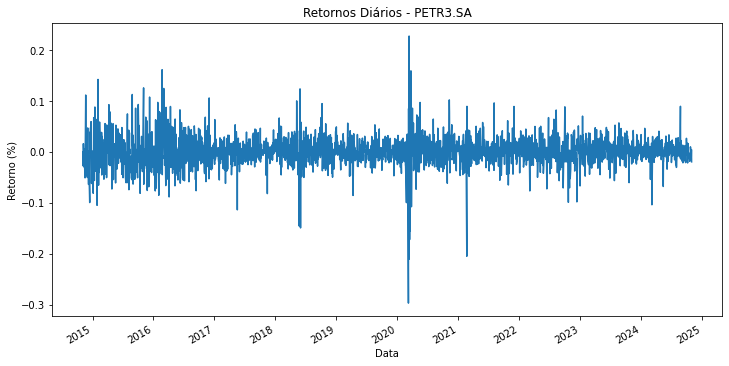

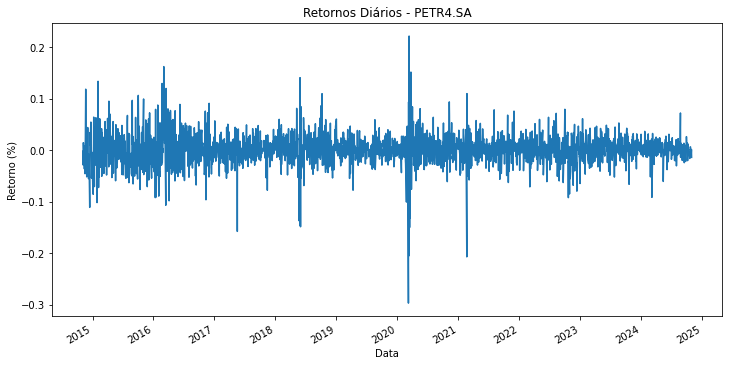

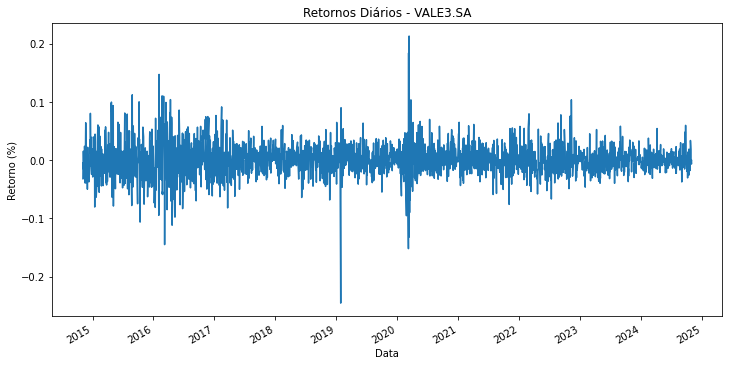

In [14]:
# Iterando sobre as colunas (exceto a coluna 'Data')
for coluna in Ações.columns[1:]:
    plt.figure(figsize=(12, 6))
    Ações[coluna].plot()
    plt.title(f'Retornos Diários - {coluna}')
    plt.xlabel('Data')
    plt.ylabel('Retorno (%)')
    plt.grid(False)
    plt.show()

# Plotando os histogramas de frequências dos retornos

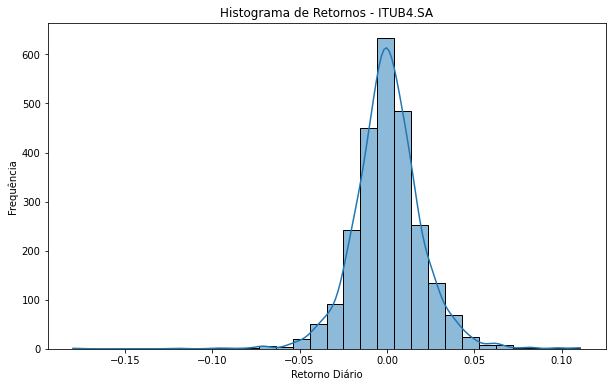

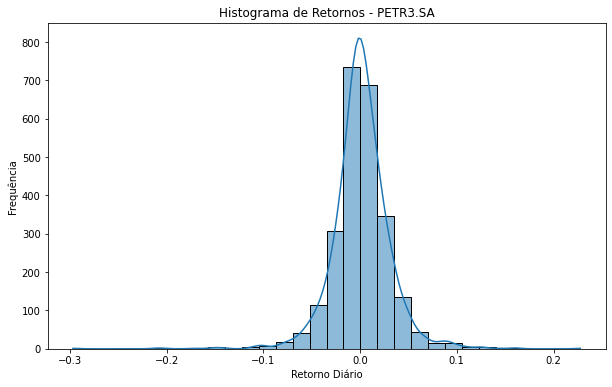

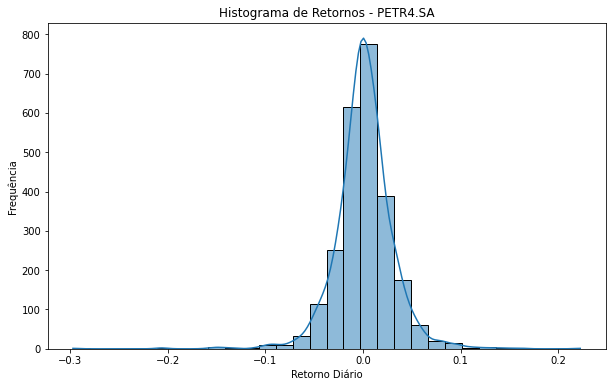

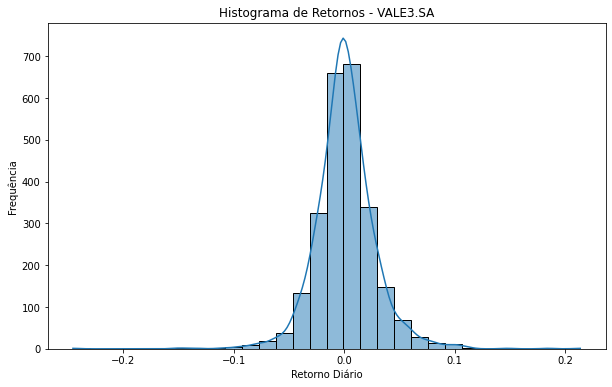

In [15]:
for coluna in Ações.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=Ações, x=coluna, bins=30, kde=True)
    plt.title(f'Histograma de Retornos - {coluna}')
    plt.xlabel('Retorno Diário')
    plt.ylabel('Frequência')
    plt.show()

# Calculando a relação Risco x Retorno

In [16]:
retorno_medio = Ações.mean()
retorno_medio

Ticker
BBAS3.SA    0.000842
ITUB4.SA    0.000572
PETR3.SA    0.001298
PETR4.SA    0.001269
VALE3.SA    0.000990
dtype: float64

In [17]:
desvio_padrao = Ações.std()
desvio_padrao

Ticker
BBAS3.SA    0.025879
ITUB4.SA    0.019634
PETR3.SA    0.030293
PETR4.SA    0.030192
VALE3.SA    0.027583
dtype: float64

In [18]:
# Criando um DataFrame com os resultados
df_risco_retorno = pd.DataFrame({'Retorno Médio': retorno_medio, 'Risco (Desvio Padrão)': desvio_padrao})
df_risco_retorno

,Retorno Médio,Risco (Desvio Padrão)
Ticker,,
BBAS3.SA,0.000842,0.025879
ITUB4.SA,0.000572,0.019634
PETR3.SA,0.001298,0.030293
PETR4.SA,0.001269,0.030192
VALE3.SA,0.000990,0.027583


In [19]:
# Criando um DataFrame com os resultados
df_risco_retorno = pd.DataFrame({'Retorno Médio': retorno_medio, 'Risco (Desvio Padrão)': desvio_padrao})

df_risco_retorno

,Retorno Médio,Risco (Desvio Padrão)
Ticker,,
BBAS3.SA,0.000842,0.025879
ITUB4.SA,0.000572,0.019634
PETR3.SA,0.001298,0.030293
PETR4.SA,0.001269,0.030192
VALE3.SA,0.000990,0.027583


# Plotando grafico de Risco x Retorno

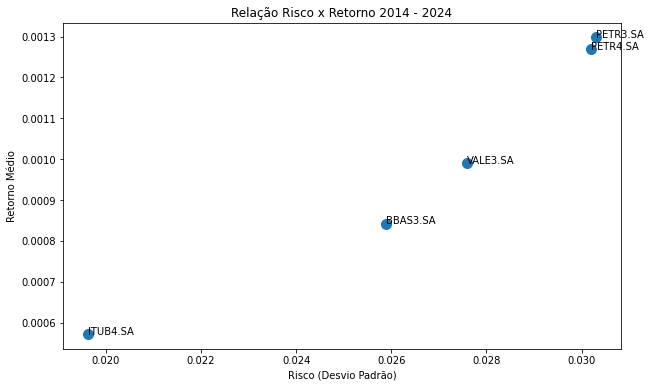

In [21]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_risco_retorno['Risco (Desvio Padrão)'], df_risco_retorno['Retorno Médio'], s=100)  # Aumenta o tamanho dos pontos

# Personalizando o gráfico
plt.xlabel('Risco (Desvio Padrão)')
plt.ylabel('Retorno Médio')
plt.title('Relação Risco x Retorno 2014 - 2024')
plt.grid(False)  # Remove as linhas de grade

# Adicionando rótulos aos pontos
for i, txt in enumerate(df_risco_retorno.index):
    plt.annotate(txt, (df_risco_retorno['Risco (Desvio Padrão)'][i], df_risco_retorno['Retorno Médio'][i]))

plt.show()